In [ ]:
!pip install augly

Defaulting to user installation because normal site-packages is not writeable
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
   ---------------------------------------- 0.0/24.3 MB ? eta -:--:--
   - -------------------------------------- 0.8/24.3 MB 6.2 MB/s eta 0:00:04
   --- ------------------------------------ 2.1/24.3 MB 6.7 MB/s eta 0:00:04
   ------ --------------------------------- 3.7/24.3 MB 6.8 MB/s eta 0:00:04
   --------- ------------------------------ 5.5/24.3 MB 7.4 MB/s eta 0:00:03
   ------------ --------------------------- 7.6/24.3 MB 7.8 MB/s eta 0:00:03
   --------------- ------------------------ 9.2/24.3 MB 8.2 MB/s eta 0:00:02
   --------------- ------------------------ 9.4/24.3 MB 6.7 MB/s eta 0:00:03
   ------------------- -------------------- 12.1/24.3 MB 7.5 MB/s eta 0:00:02
   -------------------- ------------------- 12.6/24.3 MB 7.7 MB/s eta 0:00:02
   ------------------------ --------------- 14.9/24.3 M


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\harin\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip
'rm' is not recognized as an internal or external command,
operable program or batch file.


In [2]:
# Imports
import kagglehub
import shutil
import os
from PIL import Image

In [8]:
# Dataset download
path = kagglehub.dataset_download("samuelcortinhas/cats-and-dogs-image-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\harin\.cache\kagglehub\datasets\samuelcortinhas\cats-and-dogs-image-classification\versions\4


In [9]:
# Collecting the test dataset

shutil.copytree(os.path.join(path, "test"), "test")

'test'

In [3]:
# Creating a dataset object by combining the images and adding labels

path_c = os.path.join("test", "cats")
path_d = os.path.join("test", "dogs")

images = []
for file in os.listdir(path_c):
    images.append(Image.open(os.path.join(path_c, file)))

for file in os.listdir(path_d):
    images.append(Image.open(os.path.join(path_d, file)))

labels = [1] * len(os.listdir(path_c)) + [0] * len(os.listdir(path_d))

dataset = list(zip(images, labels))

print(dataset[0])

(<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=615x769 at 0x15ECFA1A900>, 1)


In [4]:
# Seperate objects for train test split

images_c = images[:len(os.listdir(path_c))]
images_d = images[len(os.listdir(path_c)):]


In [5]:
# Train Test Split
from sklearn.model_selection import train_test_split
train_c, test_c = train_test_split(images_c, test_size=0.2, random_state=42)
train_d, test_d = train_test_split(images_d, test_size=0.2, random_state=42)

In [6]:
# Getting the final Train and Test datasets

X_train = train_c + train_d
y_train = [1] * len(train_c) + [0] * len(train_d)
X_test = test_c + test_d
y_test = [1] * len(test_c) + [0] * len(test_d)

In [7]:
# Random Shuffle
import random

random.seed(42)

train = list(zip(X_train, y_train))
test = list(zip(X_test, y_test))

random.shuffle(train)
random.shuffle(test)

X_train, y_train = zip(*train)
X_test, y_test = zip(*test)

In [8]:
print(len(X_train), len(y_train), len(X_test), len(y_test))

112 112 28 28


In [9]:
print(X_test[0], y_test[0])
print(X_train[0], y_train[0])

<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1200x1200 at 0x15ECFB8A650> 0
<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=261x193 at 0x15ECFAA3230> 1


In [14]:
# Augmentations
import augly.image as imaugs

augmentations = [
    imaugs.HFlip(),
    imaugs.VFlip(),
    imaugs.Rotate(degrees=45),
    imaugs.Brightness(factor=1.2),
    imaugs.Contrast(factor=1.2),
    imaugs.Saturation(factor=1.2),
    imaugs.Blur(radius=2.0),
    imaugs.Sharpen(),
    imaugs.Opacity(),
    imaugs.Grayscale(),
    imaugs.RandomBlur(),
    imaugs.RandomNoise(),

]

In [15]:
# Labels

aug_labels = ["HFlip", "VFlip", "Rotate", "Brightness", "Contrast", "Saturation", "Blur", "Sharpen", "Opacity", "Grayscale", "RandomBlur", "RandomNoise"]

In [16]:
# Function to return two augmentations for each image

def augment(image):
    augmented_images = []
    augmented_labels = []
    for i in range(2):
        im = image.copy()
        aug= random.sample(aug_labels,3)
        print(i+1,  aug)
        augmented_labels.append([aug_labels.index(i) for i in aug])
        
        for a in aug:
            im = augmentations[aug_labels.index(a)](im)
        augmented_images.append(im)
    return augmented_images, augmented_labels



In [17]:
aug_im, aug_l = augment(X_train[0])

1 ['Opacity', 'HFlip', 'VFlip']
2 ['RandomBlur', 'Saturation', 'VFlip']


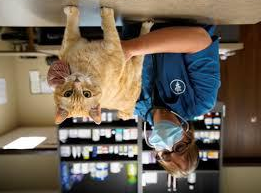

In [18]:
aug_im[0]

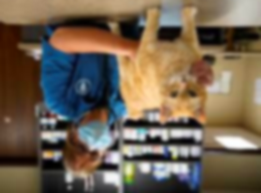

In [19]:
aug_im[1]

In [20]:
# Augmenting the entire dataset

augmented_images = list(X_train)
augmented_labels = list(y_train)

for i in range(len(X_train)):
    im = X_train[i]
    aug_im, aug_l = augment(im)
    augmented_images.extend(aug_im)
    augmented_labels.extend([y_train[i]] * 2)

1 ['RandomNoise', 'Contrast', 'Opacity']
2 ['RandomBlur', 'Contrast', 'Opacity']
1 ['Opacity', 'HFlip', 'Grayscale']
2 ['Contrast', 'Brightness', 'HFlip']
1 ['RandomNoise', 'Sharpen', 'VFlip']
2 ['RandomBlur', 'Sharpen', 'Opacity']
1 ['Opacity', 'Brightness', 'Contrast']
2 ['Opacity', 'Sharpen', 'VFlip']
1 ['Opacity', 'Brightness', 'Grayscale']
2 ['Brightness', 'VFlip', 'HFlip']
1 ['RandomBlur', 'Sharpen', 'Brightness']
2 ['Brightness', 'Sharpen', 'Blur']
1 ['Blur', 'RandomNoise', 'Sharpen']
2 ['RandomBlur', 'VFlip', 'HFlip']
1 ['Brightness', 'Opacity', 'Sharpen']
2 ['VFlip', 'Sharpen', 'Opacity']
1 ['HFlip', 'VFlip', 'Brightness']
2 ['Blur', 'HFlip', 'Rotate']
1 ['Sharpen', 'Contrast', 'Blur']
2 ['RandomBlur', 'Sharpen', 'Rotate']
1 ['HFlip', 'Saturation', 'RandomNoise']
2 ['Opacity', 'Rotate', 'HFlip']
1 ['Grayscale', 'VFlip', 'Brightness']
2 ['Grayscale', 'RandomNoise', 'HFlip']
1 ['Opacity', 'Saturation', 'Contrast']
2 ['Blur', 'Rotate', 'Contrast']
1 ['HFlip', 'Sharpen', 'Grayscal

In [21]:
# Dataset comparison

print(len(X_train), len(augmented_images))
print(len(y_train), len(augmented_labels))
print(len(X_test), len(y_test))



112 336
112 336
28 28


<BarContainer object of 2 artists>

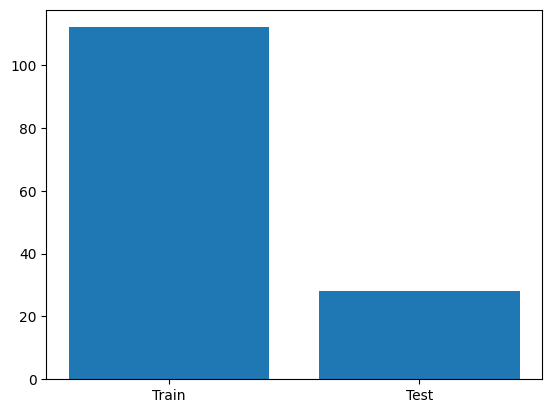

In [49]:
# Plots for comparison
import matplotlib.pyplot as plt

X_axis = ["Train", "Test"]
Y_axis = [len(X_train), len(X_test)]
plt.bar(X_axis, Y_axis)


<BarContainer object of 2 artists>

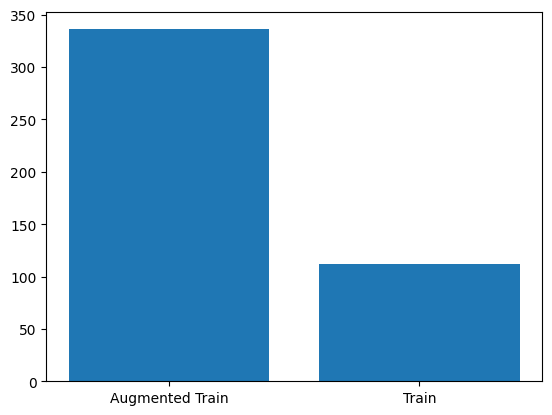

In [50]:
# Augmented vs Non-augmented

X_axis = ["Augmented Train", "Train"]
Y_axis = [len(augmented_images), len(X_train)]
plt.bar(X_axis, Y_axis)

<BarContainer object of 6 artists>

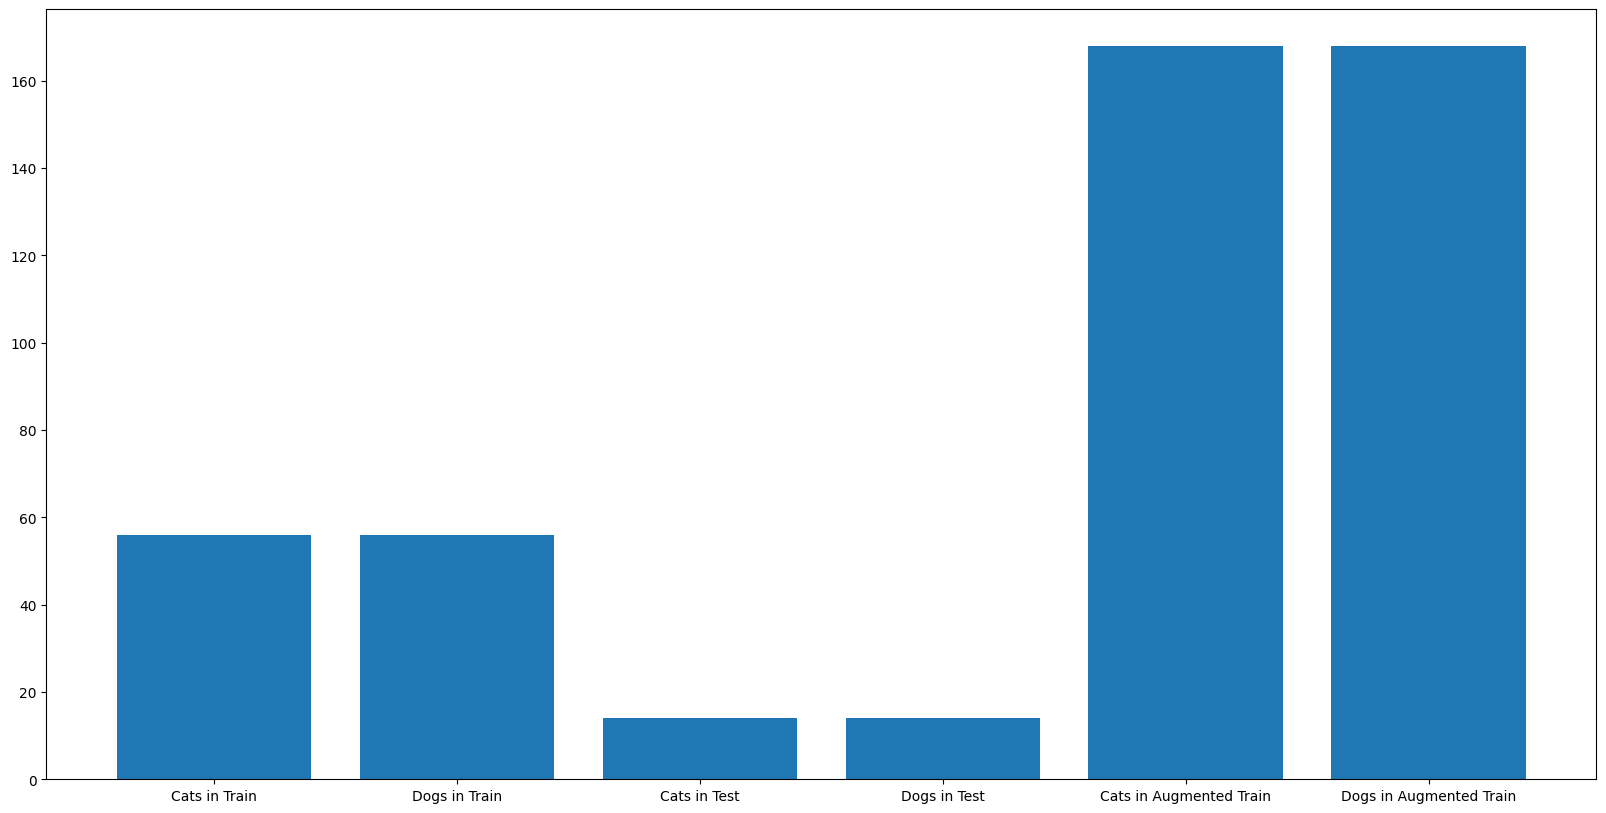

In [51]:
# Number of cats and dogs in the dataset

X_axis = ["Cats in Train", "Dogs in Train", "Cats in Test", "Dogs in Test", "Cats in Augmented Train", "Dogs in Augmented Train"]
Y_axis = [len(train_c), len(train_d), len(test_c), len(test_d), augmented_labels.count(1), augmented_labels.count(0)]

plt.figure(figsize=(20, 10))
plt.bar(X_axis, Y_axis)

In [23]:
# Saving the datasets

os.mkdir("Train")
os.mkdir("Train/cats")
os.mkdir("Train/dogs")

os.mkdir("Test_")
os.mkdir("Test_/cats")
os.mkdir("Test_/dogs")

os.mkdir("Augmented")
os.mkdir("Augmented/cats")
os.mkdir("Augmented/dogs")

for i in range(len(y_train)):
    if y_train[i] == 1:
        augmented_images[i].save(f"Train/cats/{i}.jpg")
    else:
        augmented_images[i].save(f"Train/dogs/{i}.jpg")

for i in range(len(y_test)):
    if y_test[i] == 1:
        X_test[i].save(f"Test_/cats/{i}.jpg")
    else:
        X_test[i].save(f"Test_/dogs/{i}.jpg")

for i in range(len(augmented_labels)):
    if augmented_labels[i] == 1:
        augmented_images[i].save(f"Augmented/cats/{i}.jpg")
    else:
        augmented_images[i].save(f"Augmented/dogs/{i}.jpg")

In [24]:
# Model Training - Using resnet-50 model

import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import transforms
from torchvision.models import resnet50
from torch.utils.data import DataLoader


from transformers import ResNetForImageClassification, ResNetConfig



In [25]:
resnet50

<function torchvision.models.resnet.resnet50(*, weights: Optional[torchvision.models.resnet.ResNet50_Weights] = None, progress: bool = True, **kwargs: Any) -> torchvision.models.resnet.ResNet>

In [26]:
dev = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

In [27]:
# Transformations required for resnet model

torchvision.models.resnet
t = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) 
    ])



In [34]:
# Loading the datasets with required transforms
train_data = torchvision.datasets.ImageFolder("Train", transform = t)
test_data = torchvision.datasets.ImageFolder("Test_", transform = t)
augmented_data = torchvision.datasets.ImageFolder("Augmented", transform = t)

train_loader = DataLoader(train_data, batch_size=32, shuffle=True, num_workers=20)
test_loader = DataLoader(test_data, batch_size=32, shuffle=False, num_workers=20)
augmented_loader = DataLoader(augmented_data, batch_size=32, shuffle=True, num_workers=20)


In [29]:
# Initializing weights

def weights(w):
    if isinstance(w, nn.Linear):
        torch.nn.init.xavier_uniform_(w.weight.to(dev))
        w.bias.data.fill_(0.01)

In [37]:
# Configuration for Model

config = ResNetConfig.from_pretrained("microsoft/resnet-50", num_labels=2)
model = ResNetForImageClassification(config)
model.apply(weights)
model.to(dev)

loss = nn.CrossEntropyLoss()
op = optim.Adam(model.parameters(), lr=0.001)

In [31]:
dev

device(type='cpu')

In [32]:
model.config

ResNetConfig {
  "_attn_implementation_autoset": true,
  "architectures": [
    "ResNetForImageClassification"
  ],
  "depths": [
    3,
    4,
    6,
    3
  ],
  "downsample_in_bottleneck": false,
  "downsample_in_first_stage": false,
  "embedding_size": 64,
  "hidden_act": "relu",
  "hidden_sizes": [
    256,
    512,
    1024,
    2048
  ],
  "layer_type": "bottleneck",
  "model_type": "resnet",
  "num_channels": 3,
  "out_features": [
    "stage4"
  ],
  "out_indices": [
    4
  ],
  "stage_names": [
    "stem",
    "stage1",
    "stage2",
    "stage3",
    "stage4"
  ],
  "torch_dtype": "float32",
  "transformers_version": "4.48.3"
}

In [ ]:
 # Running the model for original dataset for 10 epochs

for epoch in range(10):
    model.train()
    t_loss = 0.0

    for i, l in train_loader:
        i, l = i.to(dev), l.to(dev)
        op.zero_grad()

        o = model(i).logits
        loss_ = loss(o, l)
        loss_.backward()

        op.step()

        t_loss += loss_.item() / len(train_loader)
    
    print(f"Epoch: {epoch+1}, Loss: {t_loss}")


Epoch: 1, Loss: 5.619641214609146
Epoch: 2, Loss: 2.1180968284606934
Epoch: 3, Loss: 1.1548015028238297
Epoch: 4, Loss: 0.7300117015838623
Epoch: 5, Loss: 0.6922469586133957
Epoch: 6, Loss: 0.5847448408603668
Epoch: 7, Loss: 0.5534923896193504
Epoch: 8, Loss: 0.6270003169775009
Epoch: 9, Loss: 0.28893180936574936
Epoch: 10, Loss: 0.2866058796644211


In [39]:
# Evaluation

model.eval()
acc = 0

labels_e = []
pred_e = []

with torch.no_grad():
    for i, l in test_loader:
        i, l = i.to(dev), l.to(dev)
        o = model(i).logits
        
        _, pred = torch.max(o, 1)
        acc += torch.sum(pred == l).item()


        labels_e.extend(l.cpu().numpy())
        pred_e.extend(pred.cpu().numpy())

print(f"Accuracy: {acc/len(test_data)}")

Accuracy: 0.5714285714285714


In [40]:
# Metrics for original train dataset
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score

accuracy = accuracy_score(labels_e, pred_e)
precision = precision_score(labels_e, pred_e)
recall = recall_score(labels_e, pred_e)
f1 = f1_score(labels_e, pred_e)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")


Accuracy: 0.5714285714285714
Precision: 0.625
Recall: 0.35714285714285715
F1 Score: 0.45454545454545453


<Axes: >

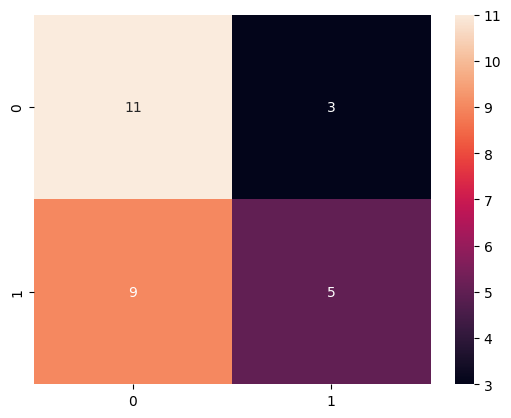

In [41]:
# Confusion Matrix
confusion = confusion_matrix(labels_e, pred_e)

import seaborn as sns

sns.heatmap(confusion, annot=True)

In [44]:
# Resetting the model for augmented dataset

model = ResNetForImageClassification(config)
model.apply(weights)
model.to(dev)

op = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
 # Running the model for the augmented dataset for 10 epochs

for epoch in range(10):
    model.train()
    t_loss = 0.0

    for i, l in augmented_loader:
        i, l = i.to(dev), l.to(dev)
        op.zero_grad()

        o = model(i).logits
        loss_ = loss(o, l)
        loss_.backward()

        op.step()

        t_loss += loss_.item() / len(train_loader)
    
    print(f"Epoch: {epoch+1}, Loss: {t_loss}")


Epoch: 1, Loss: 6.925449311733246
Epoch: 2, Loss: 2.4591840505599976
Epoch: 3, Loss: 2.067533165216446
Epoch: 4, Loss: 1.568840615451336
Epoch: 5, Loss: 1.6592378169298172
Epoch: 6, Loss: 1.3797015324234962
Epoch: 7, Loss: 0.872136827558279
Epoch: 8, Loss: 1.2167290076613426
Epoch: 9, Loss: 1.2138494327664375
Epoch: 10, Loss: 0.6843516416847706


In [46]:
# Evaluation

model.eval()
acc = 0

labels_e = []
pred_e = []

with torch.no_grad():
    for i, l in test_loader:
        i, l = i.to(dev), l.to(dev)
        o = model(i).logits 
        
        _, pred = torch.max(o, 1)
        acc += torch.sum(pred == l).item()


        labels_e.extend(l.cpu().numpy())
        pred_e.extend(pred.cpu().numpy())

print(f"Accuracy: {acc/len(test_data)}")

Accuracy: 0.6428571428571429


In [47]:
# Metrics

accuracy = accuracy_score(labels_e, pred_e)
precision = precision_score(labels_e, pred_e)
recall = recall_score(labels_e, pred_e)
f1 = f1_score(labels_e, pred_e)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.6428571428571429
Precision: 0.6111111111111112
Recall: 0.7857142857142857
F1 Score: 0.6875


<Axes: >

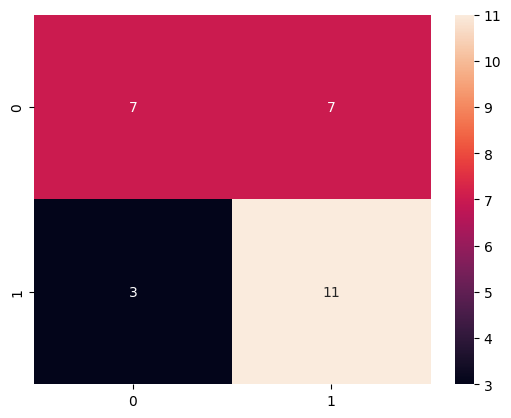

In [48]:
# Confusion Matrix
confusion = confusion_matrix(labels_e, pred_e)

import seaborn as sns

sns.heatmap(confusion, annot=True)

### Inferences:

| Metrics | Original | Augmented |
| -------- | -------- | -------- |
| Accuracy | 0.57 | 0.64 |
| Precision | 0.63 | 0.61 |
| Recall | 0.36 | 0.79 |
| F1 Score | 0.45 | 0.69 |


We have used a pretrained resnet-50 model which is fine-tuned based on the given train data. </br>

We ran both the models for 10 epochs on the train data (obtained from a random split from the test data from the datset) and the augmented data (obtained by random set of three augmentations from the train data). </br>

It can be observed that there is an increase in accuracy and a significant increase in recall with the augmentations. This indicates that the augmentations were helpful and were able to give some information gain. 
</br>


References:

https://pytorch.org/vision/main/models/generated/torchvision.models.resnet50.html